# Test de chi-cuadrado

El método Chi-cuadrado mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida las diferencias existentes entre ambas, si existen, se deben al azar. El método sirve para evaluar la prueba de hipótesis y refutar o no la hipótesis nula $H_0$. El test para comparar una distribución observada con una teórica se calcula como:

$\chi^2=\sum_i\frac{(obs_i-teo_i)^2}{teo_i}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import Image

Simulo $t=100$ observaciones de la V.A. binomial $\mathcal{B}(n=10,p=0.4)$, calculo su frecuencia y la correspondiente distribución teórica.

In [2]:
t = 100
n = 10
p = 0.4
y = np.arange(n+1)
fr_n = np.zeros(n+1)
obs = np.random.binomial(n, p, t)
x,fr = np.unique(obs,return_counts=True)
fr_n[x]= fr/t

teo = st.binom.pmf(y,n,p)

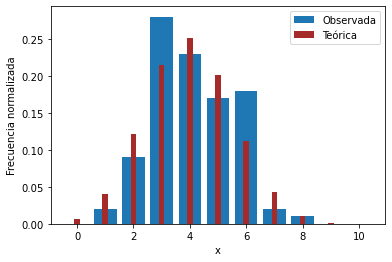

In [3]:
plt.bar(y,fr_n, label='Observada')
plt.bar(y,teo,width=0.2,color='brown', label='Teórica')
plt.xlabel('x')
plt.ylabel('Frecuencia normalizada')
plt.legend()
plt.show()

Calculo el estadístico $\chi^2$

In [4]:
chi2 = t*np.sum((fr_n-teo)**2/teo)
print('chi cuadrado vale:', chi2)

chi cuadrado vale: 10.598284851730268


Utilizo el estadístico $\chi^2$ para estudiar la hipótesis nula $H_0=$ "La distribución observada es binomial". Tomo nivel de significancia $95\%\: (1-\alpha =0.95)$, a partir del cual rechazaré o aceptaré la hipótesis. Dado que el problema tiene $\nu = n$ grados de libertad, estudio la tabla de valores críticos de chi cuadrado para distintos valores de $\alpha$.
![title](chi_table.png)

Para el valor chi cuadrado obtenido la hipotesis es aceptada de acuerdo al nivel de significancia elegido.
El *valor-p* para la distribución chi-cuadrado es $p = 1-Q(\chi^2,\nu)$ con $Q$ la acumulada de chi. El *valor-p* puede ser comparado con el valor de significancia $\alpha$ y cuando $p\leq \alpha$ la  hipótesis nula será rechazada.

In [5]:
print(f'El valor-p es:{st.chisquare(fr_n*t,teo*t)[1]}>{0.05}\n Luego la hipótesis no puede ser rechazada.')

El valor-p es:0.38965896952873424>0.05
 Luego la hipótesis no puede ser rechazada.


Vemos ahora que pasa cuando la simulación realizada no corresponde a la distribución teórica. Se hace la prueba con muestras de V.A. normales $\mathcal{N}(\mu=[2,7],\sigma=2.5)$ para $t=100$ simulaciones y $t=10000$, con $\mathcal{B}(n=10,p=0.4)$ y $\mathcal{B}(n=1000,p=0.4)$ respectivamente.

In [6]:
obs_n = np.zeros((n+1,5))
p_val = np.zeros(5)
for i in range(2,7):
    nor = np.sort(np.random.normal(i,2.5,t)) 
    for j in range(n+1): #bineo mis datos en enteros para comparar con la binomial
        obs_n[j,i-2] = np.where((nor>=j) & (nor<j+1))[0].shape[0]
    p_val[i-2] = st.chisquare(obs_n[:,i-2],teo*t)[1]
print('Los valores-p para mu=2,3,4,5,6,7 respectivamente son:\n',p_val)

Los valores-p para mu=2,3,4,5,6,7 respectivamente son:
 [1.34708299e-043 8.15460414e-038 1.78755603e-044 2.80618897e-007
 1.41039363e-290]


Dado que los *valores-p* son muy pequeños en todos los casos para cualquier $\alpha$ convencional $p\leq \alpha$, con lo que la hipótesis debe ser rechazada para todo $\mu$. Repito ahora para el segundo escenario planteado.

In [9]:
t2 = 10000
n2 = 1000
y2 = np.arange(n2+1)
teo2 = st.binom.pmf(y2,n2,p)
obs_n2 = np.zeros((n2+1,5))
p_val2 = np.zeros(5)
for k in range(2,7):
    nor = np.sort(np.random.normal(k,2.5,t2)) 
    for l in range(n2+1): #bineo mis datos en enteros para comparar con la binomial
        obs_n2[l,k-2] = np.where((nor>=l) & (nor<l+1))[0].shape[0]
    p_val2[k-2] = st.chisquare(obs_n2[:,k-2],teo2*t2)[1]
print('Los valores-p para mu=2,3,4,5,6,7 respectivamente son:\n',p_val2)

Los valores-p para mu=2,3,4,5,6,7 respectivamente son:
 [nan nan nan nan nan]


Las distribuciones son disjuntas, y el test de $\chi^2$ falla cuando la frecuencia observada es muy baja, en general se pide 5 o más cuentas en al menos el $80\%$ de las celdas. Se grafica un ejemplo abajo.

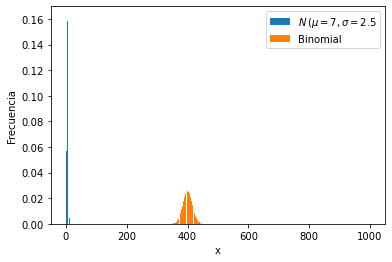

In [10]:
plt.bar(y2, obs_n2[:,-1]/t2, label='$N\,(\mu=7,\sigma=2.5$')
plt.bar(y2, teo2, label='Binomial')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()